In [1]:
import numpy as np
from array import *
import matplotlib.pyplot as plt
import os
import time
import glob
import dunestyle.matplotlib as dunestyle

DUNE plot style enabled


/home/leoperes/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Specify the folder where the files are located
folder_path = '/home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/CLs/CLs_final/plots/'

# Use glob to find all files matching the pattern in the specified folder
pattern = os.path.join(folder_path, 'limits*.dat')

# Get all files matching the pattern
files = sorted(glob.glob(pattern))

# Move the first 4 files to the last place
if len(files) > 4:
    files = files[4:] + files[:4]

# Initialize a list of 5 empty lists, one for each line
limits = [[] for _ in range(5)]

# Read each file
for file in files:
    with open(file, 'r') as f:
        # Read each line and store it in the appropriate list
        for i, line in enumerate(f.readlines()):
            number = float(line.strip())  # Convert the line to an integer
            limits[i].append(number)  # Add the number to the appropriate list


In [3]:
# Print each list of numbers
for i, values in enumerate(limits, start=1):
    print(f"Numbers from line {i} across all files: {values}")

Numbers from line 1 across all files: [1.0847847847847848e-06, 1.3873873873873873e-06, 2.124124124124124e-06, 3.6826826826826827e-06, 1.7207207207207205e-07, 2.5595595595595595e-07, 4.077077077077077e-07, 7.807807807807807e-07, 9.453453453453454e-08, 1.7507507507507505e-07, 2.635635635635636e-07, 6.936936936936936e-07]
Numbers from line 2 across all files: [2.9397397397397395e-06, 3.7207207207207204e-06, 5.382382382382382e-06, 9.056056056056055e-06, 3.9639639639639636e-07, 5.773773773773774e-07, 9.302302302302303e-07, 1.799299299299299e-06, 2.2065065065065062e-07, 3.9729729729729727e-07, 6.116116116116117e-07, 1.5945945945945947e-06]
Numbers from line 3 across all files: [3.238238238238238e-06, 4.045045045045045e-06, 5.8478478478478476e-06, 1.0047047047047047e-05, 4.4234234234234234e-07, 6.325325325325326e-07, 1.0260260260260261e-06, 1.980980980980981e-06, 2.4217217217217215e-07, 4.348348348348348e-07, 6.743743743743744e-07, 1.7477477477477479e-06]
Numbers from line 4 across all files:

In [4]:
limits

[[1.0847847847847848e-06,
  1.3873873873873873e-06,
  2.124124124124124e-06,
  3.6826826826826827e-06,
  1.7207207207207205e-07,
  2.5595595595595595e-07,
  4.077077077077077e-07,
  7.807807807807807e-07,
  9.453453453453454e-08,
  1.7507507507507505e-07,
  2.635635635635636e-07,
  6.936936936936936e-07],
 [2.9397397397397395e-06,
  3.7207207207207204e-06,
  5.382382382382382e-06,
  9.056056056056055e-06,
  3.9639639639639636e-07,
  5.773773773773774e-07,
  9.302302302302303e-07,
  1.799299299299299e-06,
  2.2065065065065062e-07,
  3.9729729729729727e-07,
  6.116116116116117e-07,
  1.5945945945945947e-06],
 [3.238238238238238e-06,
  4.045045045045045e-06,
  5.8478478478478476e-06,
  1.0047047047047047e-05,
  4.4234234234234234e-07,
  6.325325325325326e-07,
  1.0260260260260261e-06,
  1.980980980980981e-06,
  2.4217217217217215e-07,
  4.348348348348348e-07,
  6.743743743743744e-07,
  1.7477477477477479e-06],
 [5.107407407407407e-06,
  6.432432432432432e-06,
  9.168168168168167e-06,
  1.

In [5]:

# lighter DM mass
MB = np.array([5,10,20,40])
# gamma
gam = np.array([1.1, 1.5, 10])
# Heavy DM mass = Lighter DM mass * gamma
MA = np.reshape(np.multiply.outer(gam,MB),12)

PhenPaperSensitivity = [6.12877527e-07, 8.28514808e-07, 1.23738536e-06, 2.19586539e-06, 2.75543123e-07, 3.90073889e-07, 6.29320177e-07, 1.21236806e-06, 1.54204697e-07, 2.72382985e-07, 4.46945198e-07, 1.04557268e-06]

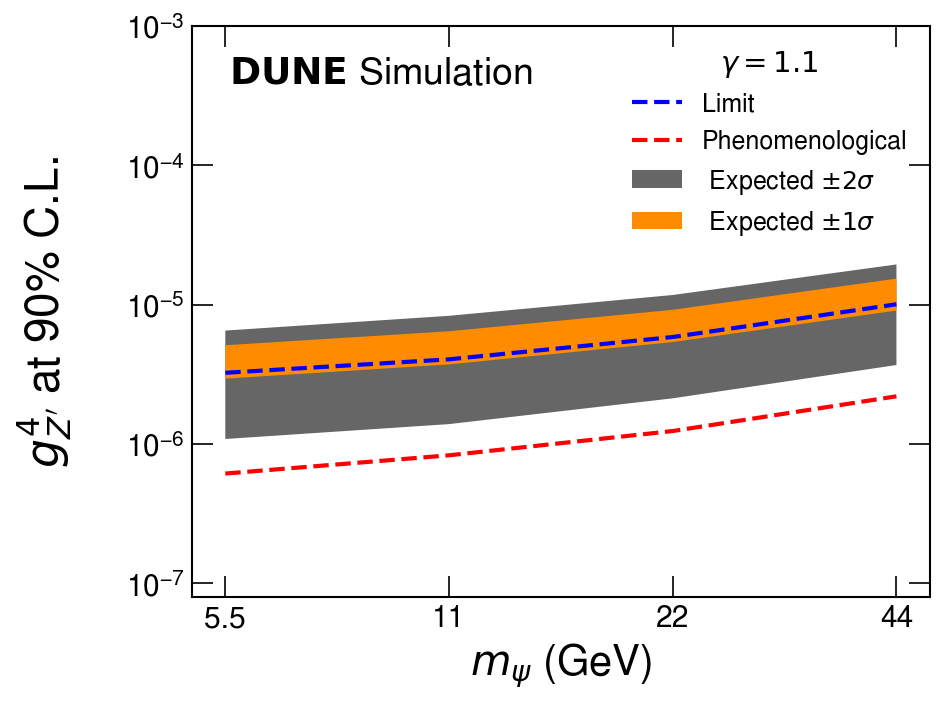

In [6]:

################################################################
#                 PLOT FIGURE          gamma = 1.1             #
################################################################

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)


ax1.plot(MA[0:4],limits[2][0:4], '--', label='Limit',color='blue')
ax1.plot(MA[0:4],PhenPaperSensitivity[0:4], '--', label='Phenomenological',color='red')

plt.fill_between(MA[0:4], limits[0][0:4], limits[4][0:4], alpha=0.6,label = r' Expected $\pm 2 \sigma$', ec=None)
plt.fill_between(MA[0:4], limits[1][0:4], limits[3][0:4], color='darkorange', alpha=1.,label = r' Expected $\pm 1 \sigma$', ec=None)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.minorticks_off()
ax1.set_xticks(MA[0:4])
ax1.set_xticklabels(['5.5','11','22','44'])
ax1.set_xlabel(r'$m_\psi$ (GeV)', fontsize=20)
ax1.set_ylabel(r'$g_{Z^\prime}^4$ at 90% C.L.',rotation=90, fontsize=22,labelpad=25)
ax1.set_ylim(8e-8, 1e-3)
minx,maxx = ax1.get_xlim()

dunestyle.Simulation()
ax1.legend(title=r'$\gamma=1.1$',title_fontsize = 14)
plt.tight_layout()
plt.savefig('Last_Sensit_b1p1'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()

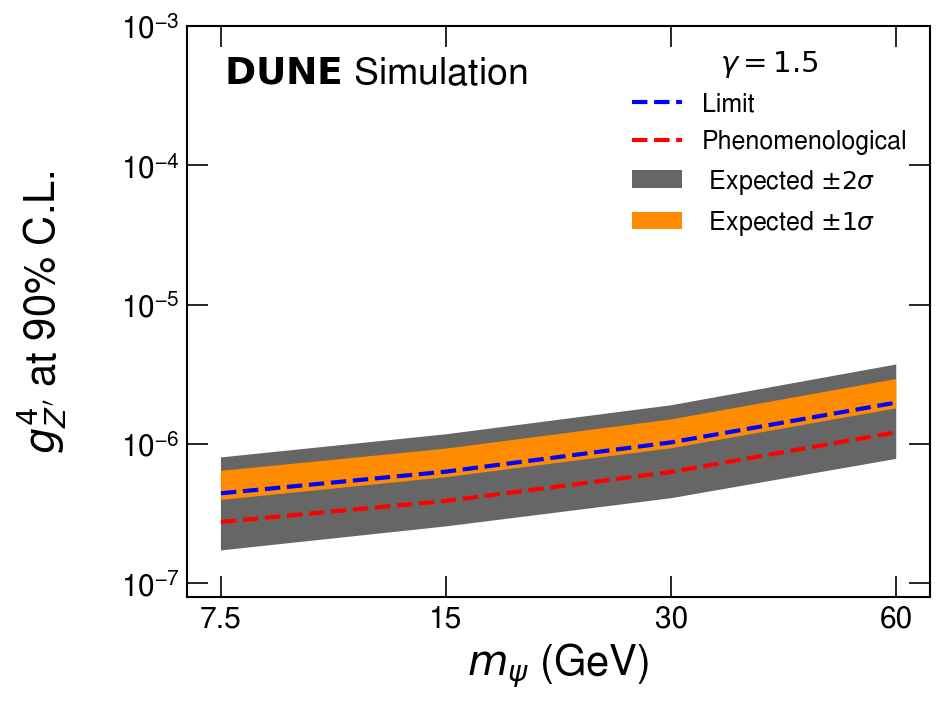

In [7]:

################################################################
#                 PLOT FIGURE          gamma = 1.5             #
################################################################

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)



ax1.plot(MA[4:8],limits[2][4:8], '--', label='Limit',color='blue')
ax1.plot(MA[4:8],PhenPaperSensitivity[4:8], '--', label='Phenomenological',color='red')

plt.fill_between(MA[4:8], limits[0][4:8], limits[4][4:8], alpha=0.6,label = r' Expected $\pm 2 \sigma$', ec=None)
plt.fill_between(MA[4:8], limits[1][4:8], limits[3][4:8], color='darkorange', alpha=1.,label = r' Expected $\pm 1 \sigma$', ec=None)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_xticks(MA[4:8])
ax1.set_xticklabels(['7.5','15','30','60'])
ax1.set_xlabel(r'$m_\psi$ (GeV)', fontsize=20)
ax1.set_ylabel(r'$g_{Z^\prime}^4$ at 90% C.L.',rotation=90, fontsize=20,labelpad=25)
ax1.set_ylim(8e-8, 1e-3)
minx,maxx = ax1.get_xlim()

ax1.minorticks_off()
ax1.legend(title=r'$\gamma=1.5$',title_fontsize = 14)
dunestyle.Simulation()
plt.tight_layout()
plt.savefig('Last_Sensit_b1p5'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()

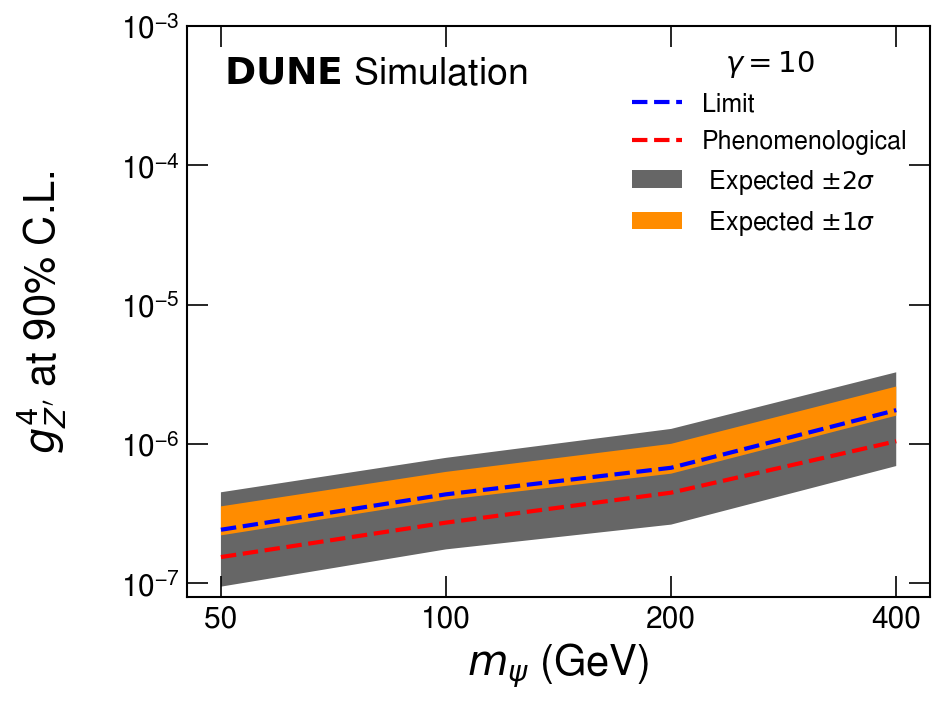

In [8]:
################################################################
#                 PLOT FIGURE          gamma = 10              #
################################################################

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)


ax1.plot(MA[8:12],limits[2][8:12], '--', label='Limit',color='blue')
ax1.plot(MA[8:12],PhenPaperSensitivity[8:12], '--', label='Phenomenological',color='red')

plt.fill_between(MA[8:12], limits[0][8:12], limits[4][8:12], alpha=0.6,label = r' Expected $\pm 2 \sigma$', ec=None)
plt.fill_between(MA[8:12], limits[1][8:12], limits[3][8:12], color='darkorange', alpha=1.,label = r' Expected $\pm 1 \sigma$', ec=None)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_xticks(MA[8:12])
ax1.set_xticklabels(['50','100','200','400'])
ax1.set_xlabel(r'$m_\psi$ (GeV)', fontsize=20)
ax1.set_ylabel(r'$g_{Z^\prime}^4$ at 90% C.L.',rotation=90, fontsize=20,labelpad=25)
ax1.set_ylim(8e-8, 1e-3)
ax1.set_yscale('log')
minx,maxx = ax1.get_xlim()

ax1.minorticks_off()
ax1.legend(title=r'$\gamma=10$',title_fontsize = 14)
dunestyle.Simulation()
plt.tight_layout()
plt.savefig('Last_Sensit_b10'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()